In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path = "/content/kc_house_data.csv"
df = pd.read_csv(path)

In [ ]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
cut = df[['id','price','bedrooms','bathrooms','sqft_living','floors']]

In [ ]:
cut.head(10)

,id,price,bedrooms,bathrooms,sqft_living,floors
0,7129300520,221900.0,3,1.00,1180,1.0
1,6414100192,538000.0,3,2.25,2570,2.0
2,5631500400,180000.0,2,1.00,770,1.0
3,2487200875,604000.0,4,3.00,1960,1.0
4,1954400510,510000.0,3,2.00,1680,1.0
5,7237550310,1225000.0,4,4.50,5420,1.0
6,1321400060,257500.0,3,2.25,1715,2.0
7,2008000270,291850.0,3,1.50,1060,1.0
8,2414600126,229500.0,3,1.00,1780,1.0
9,3793500160,323000.0,3,2.50,1890,2.0


In [ ]:
vis = cut[['id','floors','sqft_living','bedrooms','bathrooms','price']]

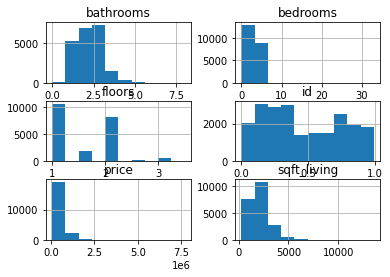

In [ ]:
vis = cut.hist()
plt.show()

*Lets plot each of these features vs the price, to see how linear the relationship is:*

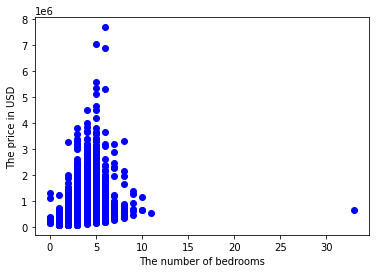

In [ ]:
plt.scatter(cut.bedrooms, cut.price,  color='blue')
plt.xlabel("The number of bedrooms")
plt.ylabel("The price in USD")
plt.show()

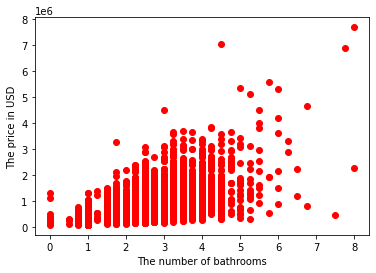

In [ ]:
plt.scatter(cut.bathrooms, cut.price,  color='red')
plt.xlabel("The number of bathrooms")
plt.ylabel("The price in USD")
plt.show()

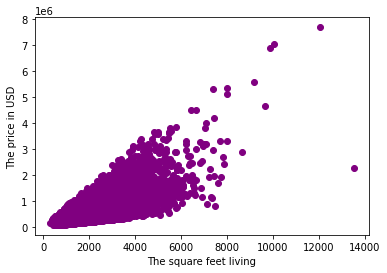

In [ ]:
plt.scatter(cut.sqft_living, cut.price,  color='purple')
plt.xlabel("The square feet living")
plt.ylabel("The price in USD")
plt.show()

#Creating train and test dataset:


Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using np.random.rand() function: 

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cut[msk]
test = cut[~msk]

#I. Simple Regression Model
Linear Regression fits a linear model with coefficients  θ=(θ1,...,θn)  to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation.

##Train data distribution
Using sklearn package to model data.

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[['sqft_living']])
train_y = np.asanyarray(train[['price']])
reg.fit(train_x,train_y)
# The coefficients
print ('Coefficients: ', reg.coef_)
print('Intercept:', reg.intercept_)

Coefficients:  [[281.83257753]]
Intercept: [-45480.16295355]


**Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.

##Plot outputs:

We can plot the fit line over the data:

Text(0, 0.5, 'The price in USD')

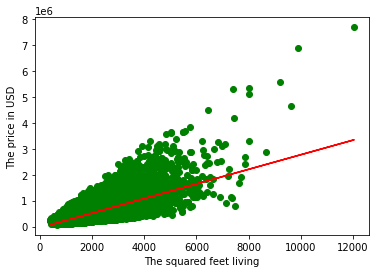

In [ ]:
plt.scatter(train.sqft_living, train.price,  color='green')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r')
plt.xlabel("The squared feet living")
plt.ylabel("The price in USD")

**Evaluation**

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

• Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

• Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

• Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error.

• R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['sqft_living']])
test_y = np.asanyarray(test[['price']])
test_y_hat = reg.predict(test_x)

print("Mean absolute error (MAE) : %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error (MAE) : 173855.45
Residual sum of squares (MSE): 71291809012.57
R2-score: -0.02


#II. Multiple Regression Model

What if we want to predict Violent crime total using more than one variable?

If we want to use more variables in our model to predict Violent crime total, we can use **Multiple Linear Regression**. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response or target (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:

##*Y:Target Variable

##X1:Predictor Variable 1

##X2:Predictor Variable 2

##X3:Predictor Variable 3

##X4:Predictor Variable 4


##a:intercept

##b1:coefficients of Variable 1

##b2:coefficients of Variable 2

##b3:coefficients of Variable 3

##b4:coefficients of Variable 4*

The equation is given by:

**Yp=a+b1X1+b2X2+b3X3+b4X4**

In reality, there are multiple variables that predict the price. When more than one independent variable is present, the process is called multiple linear regression. For example, predicting the price using the number of bedrooms, bathrooms, floors and sqft_living in the house . The good thing here is that Multiple linear regression is the extension of simple linear regression model.

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
x = np.asanyarray(train[['bedrooms','bathrooms','sqft_living','floors']])
y = np.asanyarray(train[['price']])
reg.fit(x,y)
# The coefficients
print ('Intercept: ', reg.intercept_)
print ('Coefficients: ', reg.coef_)

Intercept:  [69578.23765007]
Coefficients:  [[-57715.8197775   10370.2064146     308.93822854    849.42117728]]


As mentioned before, Coefficient and Intercept , are the parameters of the fit line. Given that it is a multiple linear regression, with 5 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ( y^ ) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

- Solving the model parameters analytically using closed-form equations
- Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

# Prediction

In [ ]:
y_hat= reg.predict(test[['bedrooms','bathrooms','sqft_living','floors']])
x = np.asanyarray(test[['bedrooms','bathrooms','sqft_living','floors']])
y = np.asanyarray(test[['price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(x, y))

Residual sum of squares: 69506455634.26
Variance score: 0.50


explained variance regression score:
If  y^  is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

explainedVariance(y,y^)=1−Var{y−y^}Var{y} 
The best possible score is 1.0, lower values are worse.

Thanks for completing this lesson!